# Stress Skin

Roof with cladding spanning perpendicular to the ridge (on purlins parallel to the ridge).

In [736]:
import math

In [737]:
# Assume the shear buckling strength of the decking and the axial strength of the edge purlin are adequate.

In [738]:
frame_a = 6000                    #[mm], frame spacing
frame_b = 10000                   #[mm], rafter length

#### Sheeting

In [739]:
sheet_t = 0.7                     #[mm], metal net sheet thickness
sheet_n = 2                       #[-]. number of decking lengths
sheet_trsp = 150                  #[mm], trough spacing
sheet_trwidth = 25                #[mm], trough width
sheet_crwidth = 75                #[mm], crest width
sheet_width_cover = 600           #[mm], cover width
sheet_fy = 350                    #[MPa], sheeting yield limit strength
sheet_fu = 390                    #[MPa], sheeting strength
sheet_E = 210000                  #[MPa], young modulus
sheet_type = 1                    # 1 for sheeting, 2 for decking

#### Sheeting fasteners, self drilling teks

In [740]:
sf_dia = 6                        #[mm], tek diameter
sf_seam_lap_num_per_meter = 3     #[-], number of seam lap fasteners per 1m run.
sf_seam_fastener_dia = 6          #[mm], diametre of seam fastener
sf_purlin_fastener_type = 1       # 1 for every trough, 2 for alternate trough
sf_purlin_fastener_num = 3        #[-], number of sheet-purlin fasteners, including those at the overlaps
sf_purlin_fastener_type = 1       #self drilling teks screw, 1 for collar head, 2 for collar head + neoprene washer 
sf_purlin_fastener_dia = 6        #[mm], diametre of sheet-purlin fastener


#### Purlin

In [741]:
purlin_spacing = 1500             #[mm], purlin spacing

In [742]:
# numnber of purlin bays
purlin_num_bays = math.trunc(frame_b / purlin_spacing)
# number of purlins
purlin_num = purlin_num_bays + 1
# number of seam fasteners per side lap (excluding those which pass trough both sheets and supporting purlin)
ns = math.trunc(frame_b / 1000 * sf_seam_lap_num_per_meter) + 1

In [743]:
print("Number of seam fasteners per side lap length  = ", ("%2.1f" % ns), " [-]")
print("Number of purlins                             = ", ("%2.1f" % purlin_num), " [-]")

Number of seam fasteners per side lap length  =  31.0  [-]
Number of purlins                             =  7.0  [-]


## Capacity

In [744]:
# Strength of fasteners in seam of two adjacent sheets (Table 5.1)
t = sheet_t
dn = sf_seam_fastener_dia
fu = sheet_fu
# Design strength of individual seam fastener (Table 5.1)
Fs = 2.9 * (t / dn)**(0.5) * fu * dn * t
Fs = min(Fs, 3800)

In [745]:
print("Fs                        = ", ("%2.3f" % Fs), " [N]")

Fs                        =  1622.502  [N]


In [746]:
# Strength of cladding-purlin fasteners (Table 5.1)
t =  sheet_t
dn = sf_purlin_fastener_dia
fu = sheet_fu
Fp = 1.9 * fu *dn * t
lmt = -999999
slip_p =  -999999    #[mm/N], slip of sheet-purlin fastener
slip_sc = -999999    #[mm/N],  slip of sheet-sheet connector fastener, NOT USED - 2 sides fixed 
if sf_purlin_fastener_type == 1:
    slip_p = 0.00015
    lmt = 6500
if sf_purlin_fastener_type == 2:
    slip_p = 0.35
    lmt = 8000
    
if sf_purlin_fastener_dia <= 5.5:
    lmt = 6500
elif sf_purlin_fastener_dia >= 6.3:
    lmt = 8000
else:
    lmt = 6500 + (1500 * (sf_purlin_fastener_dia - 5.5) / 0.8)
    
Fp = min(Fp, lmt)

In [747]:
print("lmt                       = ", ("%2.3f" % lmt), " [N]")
print("Fp                        = ", ("%2.3f" % Fp), " [N]")

lmt                       =  7437.500  [N]
Fp                        =  3112.200  [N]


For panels fixed on two sides (Clause 5.1.1):

In [748]:
nf = sf_purlin_fastener_num
# Factors to allow for the number of sheet/purlin fasteners per sheet width, Table 5.2
b1 = -999999
b2 = -999999
if nf == 2:
    b1 = 0.13
    b2 = 1
    beta2 = 1
if nf == 3:
    b1 = 0.3
    b2 = 1
    beta2 = 1
if nf == 4:
    b1 = 0.44
    b2 = 1.04
    beta2 = 1.11
if nf == 5:
    b1 = 0.58
    b2 = 1.13
    beta2 = 1.25
if nf == 6:
    b1 = 0.71
    b2 = 1.22
    beta2 = 1.4
if nf == 7:
    b1 = 0.84
    b2 = 1.33
    beta2 = 1.56
if nf == 8:
    b1 = 0.97
    b2 = 1.45
    beta2 = 1.71
if nf == 9:
    b1 = 1.1
    b2 = 1.56
    beta2 = 1.88
if nf == 10:
    b1 = 1.23
    b2 = 1.68
    beta2 = 2.04
        
if sheet_type == 1:
    beta1 = b1
    beta3 = (nf - 1) / nf
if sheet_type == 2:
    beta1 = b2
    beta3 = 1

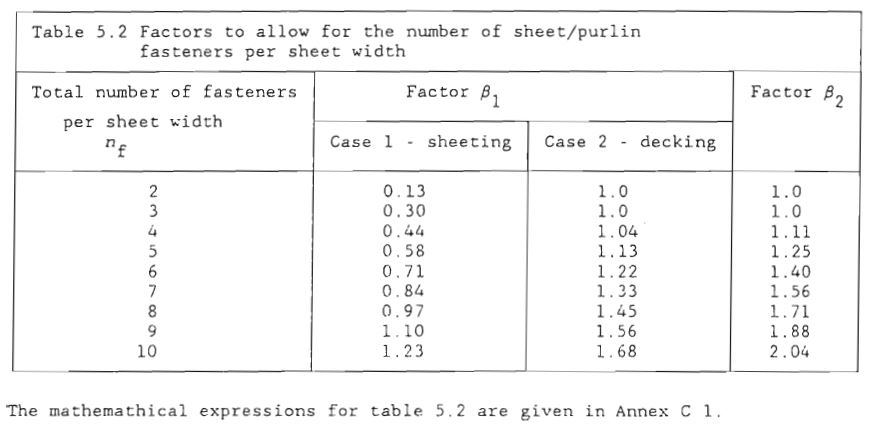

In [749]:
print("beta1                     = ", ("%2.3f" % beta1), " [-]")
print("beta2                     = ", ("%2.3f" % beta2), " [-]")
print("beta3                     = ", ("%2.3f" % beta3), " [-]")

beta1                     =  0.300  [-]
beta2                     =  1.000  [-]
beta3                     =  0.667  [-]


### Seam capacity

In [750]:
np = purlin_num
slip_s = 0.00025        #[mm/N], slip of seam fastener
# Seam capacity
V_ult_sc = ns * Fs + beta1 / beta3 * np * Fp

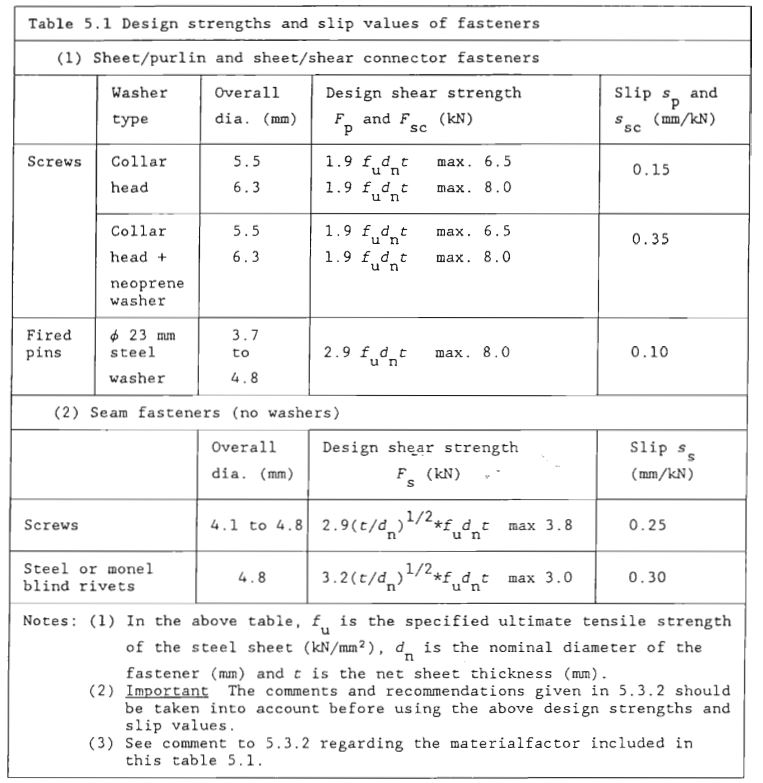

In [751]:
print("Number of purlins         = ", ("%2.1f" % np), " [-]")
print("V_ult_sc                  = ", ("%2.3f" % V_ult_sc), " [N]")

Number of purlins         =  7.0  [-]
V_ult_sc                  =  60100.998  [N]


### Capacity of end sheet-purlin fasteners

In [752]:
# End sheet-purlin fasteners capacity
V_ult_sp = beta2 * np * Fp

In [753]:
print("V_ult_sp                  = ", ("%2.3f" % V_ult_sp), " [N]")

V_ult_sp                  =  21785.400  [N]


### Capacity of purlin rafter connection

#### NOTE THAT CONNECTION BETWEEN RAFTER AND PURLIN STIFFNESS AND CAPACITY IS FOR 203x51x2 ZED PROFILE

In [754]:
# Table 5.3
Fpr = 4400                 #[N], capacity of purlin-rafter connection, taking connection #9 from Table 5.3
slip_pr = 0.0014           #[mm/N], slip of purlin-rafter connection
V_ult_pr = np * Fpr

In [755]:
print("V_ult_pr                  = ", ("%2.3f" % V_ult_pr), " [N]")

V_ult_pr                  =  30800.000  [N]


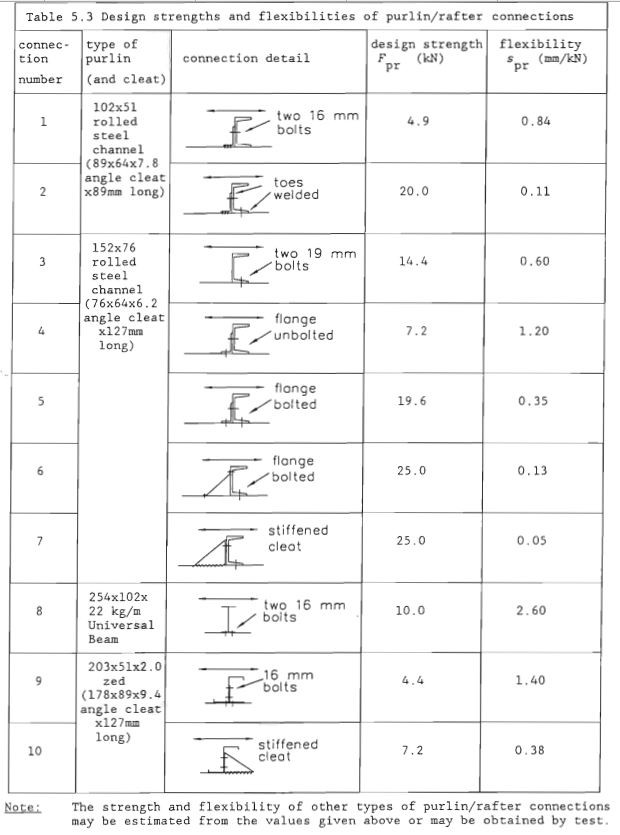

### Design shear capacity

In [756]:
VRd = min(V_ult_sc, V_ult_sp, V_ult_pr)

In [757]:
print("VRd                       = ", ("%2.3f" % VRd), " [N]")

VRd                       =  21785.400  [N]


## Deformation

### Deformation of seam fasteners

In [758]:
# slip per one seam at VRd shear force
# assuming equal distribution of force per all bolts, THIS IS NOT OK!!!
slip_per1seam = VRd / ns * slip_s
num_seams = math.trunc(frame_a / sheet_width_cover)
slip_total_per_all_seams = slip_per1seam * num_seams

In [759]:
print("slip_per1seam                      = ", ("%2.5f" % slip_per1seam), " [mm]")
print("num_seams                          = ", ("%2.1f" % num_seams), " [-]")
print("slip total per all seams in 1 bay  = ", ("%2.3f" % slip_total_per_all_seams), " [mm]")

slip_per1seam                      =  0.17569  [mm]
num_seams                          =  10.0  [-]
slip total per all seams in 1 bay  =  1.757  [mm]


### Deformation of end sheet-purlin fasteners
End sheet is located above the rafter member.

In [760]:
slip_p_per1line = VRd / np * slip_p
num_lines = 1
slip_p_total_per_1bay = slip_p_per1line * num_lines

In [761]:
print("slip_per1line                       = ", ("%2.5f" % slip_p_per1line), " [mm]")
print("num_lines                           = ", ("%2.1f" % num_lines), " [-]")
print("slip p total per 1 bay              = ", ("%2.3f" % slip_p_total_per_1bay), " [mm]")

slip_per1line                       =  0.46683  [mm]
num_lines                           =  1.0  [-]
slip p total per 1 bay              =  0.467  [mm]


### Deformation of purlin-rafter connection

In [762]:
slip_pr_per1line = VRd / np * slip_pr
num_lines = 1
slip_pr_total_per_1bay = slip_pr_per1line * num_lines

In [763]:
print("slip_per1line                       = ", ("%2.5f" % slip_pr_per1line), " [mm]")
print("num_lines                           = ", ("%2.1f" % num_lines), " [-]")
print("slip pr total per 1 bay             = ", ("%2.3f" % slip_pr_total_per_1bay), " [mm]")

slip_per1line                       =  4.35708  [mm]
num_lines                           =  1.0  [-]
slip pr total per 1 bay             =  4.357  [mm]


### Total deformation

In [764]:
def_tot = slip_total_per_all_seams + slip_p_total_per_1bay + slip_pr_total_per_1bay

In [765]:
print("def_tot                             = ", ("%2.2f" % def_tot), " [mm]")

def_tot                             =  6.58  [mm]


### Stiffness

In [766]:
E_roof_1bay = VRd / def_tot 

In [767]:
print("VRd                                 = ", ("%2.2f" % VRd), " [N]")
print("E_roof_1bay                         = ", ("%2.2f" % E_roof_1bay), " [N/mm]")

VRd                                 =  21785.40  [N]
E_roof_1bay                         =  3310.45  [N/mm]


### Supporting frame stiffness

In [768]:
Fd = 30000                         #[N], horizontal load at the eave
def_frame_hz = 48.5                #[mm], frame sway displacement at the eave
E_frame = Fd / def_frame_hz
ratio = E_roof_1bay / E_frame

In [769]:
print("E_frame                             = ", ("%2.2f" % E_frame), " [N/mm]")
print("ratio 'roof/frame'                  = ", ("%2.2f" % ratio), " [-]")

E_frame                             =  618.56  [N/mm]
ratio 'roof/frame'                  =  5.35  [-]
